In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from costs import compute_mse
%load_ext autoreload
%autoreload 2

# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [2]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least squares: TODO
    # returns mse, and optimal weights
    # ***************************************************
    
    #Calcul of the optimal weights
    wStar = np.linalg.inv(tx.T.dot(tx)).dot(tx.T).dot(y);
    
    #Calcul of the error by MSE
    MSE = compute_mse(y, tx, wStar)
    
    return (MSE, wStar)

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [3]:
from helpers import *
from plots import *
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    # ***************************************************
    
    MSE, wStar = least_squares(y,tx)
    LSw0, LSw1 = wStar
    print( (MSE,wStar) )
    grid_search_and_compare(y,tx,mean_x, std_x,height, weight, LSw0, LSw1 )
    

Test it here

(15.385887868829398, array([ 73.293922  ,  13.47971243]))
Grid Search: loss*=15.55870336860953, w0*=72.72727272727272, w1*=13.636363636363626, execution time=0.649 seconds


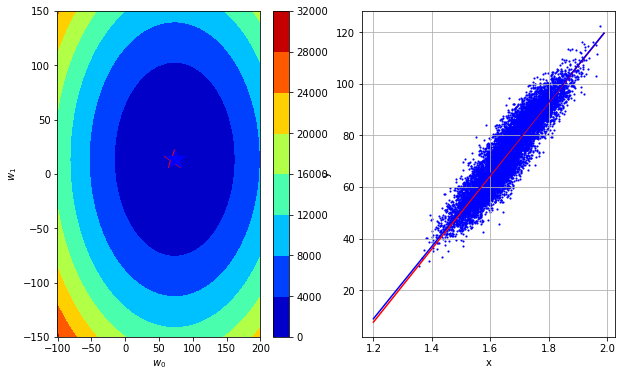

In [4]:
test_your_least_squares()

## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [5]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [6]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    # ***************************************************
    degree_range = np.arange(0,degree+1)
    degree_array = np.matlib.repmat(degree_range, len(x), 1)
    x_array = np.matlib.repmat(x, degree+1,1).T
    
    return(np.power(x_array,degree_array)) 

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [25]:
from costs import compute_mse
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        # ***************************************************
        tx = build_poly(x,degree)

        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate RMSE: TODO
        # ***************************************************
        (MSE, weights) = least_squares(y,tx)
        rmse = np.sqrt(2*MSE)
        
        print(weights)
        
        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

[ 0.83431835 -0.28976617]
Processing 1th experiment, degree=1, rmse=0.47187607963421874
[-0.11521169  1.58466469 -0.76372992  0.08215316]
Processing 2th experiment, degree=3, rmse=0.25858277667737467
[  3.22356224e-01  -4.05990059e-01   1.64303559e+00  -1.12131787e+00
   2.72479663e-01  -2.25108727e-02  -7.79999519e-04   1.53902678e-04]
Processing 3th experiment, degree=7, rmse=0.24965870360910083
[ -3.88430911e+00  -3.76448434e+00   3.74776569e+01  -7.86457079e+01
   8.90462034e+01  -6.13405490e+01   2.69134029e+01  -7.65928853e+00
   1.40352130e+00  -1.58676840e-01   9.86813923e-03  -2.30822505e-04
  -2.54661778e-06]
Processing 4th experiment, degree=12, rmse=1.1987175079823018


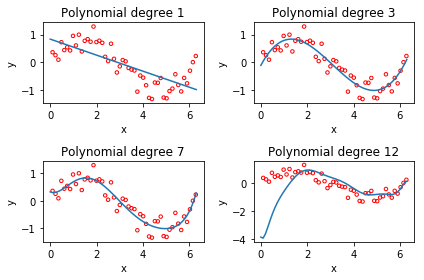

In [26]:
polynomial_regression()

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [48]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    # ***************************************************
    random_range = np.random.permutation(np.arange(0,len(x)))
    mid_point = np.int_(len(x)*ratio)
    
    
    train_data = (x[range(mid_point)],y[range(mid_point)])
    test_data = (x[range(mid_point, len(x))],y[range(mid_point, len(x))])
    
    return (train_data, test_data)
    

ANSWER : The ordrer of the data isn't important when the data are splitted

Then, test your `split_data` function below.

In [55]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    (train_data, test_data) = split_data(x,y,ratio,seed)

    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    train_data_tx = build_poly(train_data[0],degree)
    test_data_tx = build_poly(test_data[0],degree)
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calcualte weight through least square.: TODO
    # ***************************************************
    (trainMSE, trainWeights) = least_squares(train_data[1],train_data_tx)
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    # ***************************************************
    rmse_tr = np.sqrt(2*trainMSE)
    mse_te = compute_mse(test_data[1], test_data_tx, trainWeights)
    rmse_te = np.sqrt(2*mse_te)
    
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [58]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.488, Testing RMSE=0.296
proportion=0.9, degree=3, Training RMSE=0.266, Testing RMSE=0.194
proportion=0.9, degree=7, Training RMSE=0.257, Testing RMSE=0.186
proportion=0.9, degree=12, Training RMSE=1.074, Testing RMSE=0.492
proportion=0.5, degree=1, Training RMSE=0.458, Testing RMSE=0.547
proportion=0.5, degree=3, Training RMSE=0.261, Testing RMSE=0.267
proportion=0.5, degree=7, Training RMSE=0.232, Testing RMSE=0.313
proportion=0.5, degree=12, Training RMSE=0.939, Testing RMSE=0.743
proportion=0.1, degree=1, Training RMSE=0.597, Testing RMSE=0.497
proportion=0.1, degree=3, Training RMSE=0.027, Testing RMSE=0.447
proportion=0.1, degree=7, Training RMSE=0.620, Testing RMSE=3.662
proportion=0.1, degree=12, Training RMSE=13.697, Testing RMSE=68231.697


# 3 Ridge Regression
Please fill in the function below.

In [81]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
        
    #Calcul of the optimal weights
    N = len(y)
    lenX = len(tx.T)
    
    wStar = np.linalg.inv(tx.T.dot(tx)+2*N*lambda_*np.eye(lenX)).dot(tx.T).dot(y);
    
    #Calcul of the error by MSE
    MSE = compute_mse(y, tx, wStar)
    
    return (MSE, wStar)
    
    
    

In [92]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    (train_data, test_data) = split_data(x,y,ratio,seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    train_data_tx = build_poly(train_data[0],degree)
    test_data_tx = build_poly(test_data[0],degree)
    

    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ridge regression with a given lambda
        # ***************************************************
        print(ind)
        (trainMSE, trainWeights) = ridge_regression(train_data[1],train_data_tx, lambda_)
        rmse_tr.append(np.sqrt(2*trainMSE))
        mse_te = compute_mse(test_data[1], test_data_tx, trainWeights)
        rmse_te.append(np.sqrt(2*mse_te))
        
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)




0
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.233, Testing RMSE=0.303
1
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.235, Testing RMSE=0.296
2
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.238, Testing RMSE=0.288
3
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.242, Testing RMSE=0.282
4
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.245, Testing RMSE=0.279
5
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.247, Testing RMSE=0.277
6
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.248, Testing RMSE=0.275
7
proportion=0.5, degree=7, lambda=0.003, Training RMSE=0.249, Testing RMSE=0.274
8
proportion=0.5, degree=7, lambda=0.007, Training RMSE=0.250, Testing RMSE=0.272
9
proportion=0.5, degree=7, lambda=0.016, Training RMSE=0.251, Testing RMSE=0.269
10
proportion=0.5, degree=7, lambda=0.037, Training RMSE=0.256, Testing RMSE=0.266
11
proportion=0.5, degree=7, lambda=0.085, Training RMSE=0.268, Testing RMSE=0.268
12
proportion=

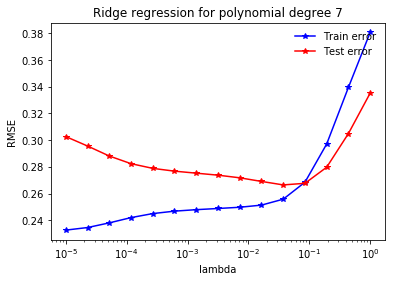

In [93]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)